# Laboratorio 2: Series de tiempo
## Data Science

#### Pablo Escobar #20436
#### Eduardo Ramirez #19946


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from scipy.stats import normaltest
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller


##### Transformacion de xlsx a csv y limpieza de na


In [45]:

read_file = pd.read_excel ("IMPORTACION-VOLUMEN-2023-06.xlsx")

read_file.to_csv ("IMPORTACION-VOLUMEN-2023-06.csv",index = None,header=True)
    
df = pd.DataFrame(pd.read_csv("IMPORTACION-VOLUMEN-2023-06.csv"))
  
print(df)

read_file = pd.read_excel ("prices-complete.xlsx")
read_file.to_csv ("prices-complete.csv",index = None,header=True)
    
df = pd.DataFrame(pd.read_csv("prices-complete.csv"))

print(df)

dataf = pd.read_excel("IMPORTACION-VOLUMEN-2023-06.xlsx")
dataf.head()

dataf = dataf.dropna(how='all').reset_index(drop=True)
dataf.columns = dataf.iloc[0]
dataf = dataf.drop(0).reset_index(drop=True)

dataf.head()

                                            Unnamed: 0 Unnamed: 1 Unnamed: 2  \
0                                                  NaN        NaN        NaN   
1                                                  NaN        NaN        NaN   
2                                                  NaN        NaN        NaN   
3                                                  NaN        NaN        NaN   
4                        Unidad:   Barril (42 galones)        NaN        NaN   
..                                                 ...        ...        ...   
273                                2023-04-01 00:00:00   25001.96  119761.46   
274                                2023-05-01 00:00:00   30492.66  171826.96   
275                                2023-06-01 00:00:00   21200.45  155718.36   
276                                                NaN        NaN        NaN   
277  Fuente: informes mensuales de titulares de lic...        NaN        NaN   

    Unnamed: 3 Unnamed: 4 Unnamed: 5  U

,Unidad: Barril (42 galones),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Naftas,Petcoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,MTBE,Orimulsión,Petróleo reconstituido,Total importación
1,2001-01-01 00:00:00,0,27748.99,214581.84,0,0,0,0,194065.738095,820,...,0,0,0,0,0,566101.99,8402,0,715344,2312639.048095
2,2001-02-01 00:00:00,0,7503.57,294609,0,0,0,0,170703.380952,3054,...,0,0,0,0,0,489525.8,0,0,370166,1769208.760952
3,2001-03-01 00:00:00,0,26304.32,315263.8,0,0,0,0,161837.371429,677,...,0,0,0,0,0,575559.68,0,0,360530,1945770.261429
4,2001-04-01 00:00:00,0,7885.89,205653,0,0,0,0,163048.642857,3399,...,0,0,0,0,0,437745.42,8184,0,359527,1623637.762857


##### Verificacion de datos en columnas, mostrar datos y columnas

In [46]:

cols = ["Gasolina regular", "Gasolina super", "Diesel bajo azufre", "Gas licuado de petróleo"]

pcols = [col for col in cols if col in dataf.columns]

print(pcols)

import_cols = dataf.columns.tolist()
print(pcols)

df_price = pd.read_excel("prices-complete.xlsx")
df_price.head()
df_price = df_price.dropna(how='all').reset_index(drop=True)

df_price.columns = df_price.iloc[0]
df_price = df_price.drop(0).reset_index(drop=True)

df_price.head()

pri_cols = df_price.columns.tolist()
pri_cols

df_price.head(10)


[]
[]


,PRECIOS PROMEDIO A CONSUMIDOR FINAL EN CIUDAD CAPITAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,FECHA,Tipo de Cambio,Superior,Regular,Diesel,Bunker,Glp Cilindro 25Lbs.,NaN
1,NaN,GTQ/USD,GTQ/GALON,GTQ/GALON,GTQ/GALON,GTQ/GALON,GTQ/CIL 25 LB,GTQ/LB
2,2023-01-01 00:00:00,7.85222,32.55,30.99,33.75,15.99,122,4.88
3,2023-01-02 00:00:00,7.85222,32.55,30.99,33.75,15.99,122,4.88
4,2023-01-03 00:00:00,7.84773,32.56,31.42,35.31,16.39,122,4.88
5,2023-01-04 00:00:00,7.84906,32.56,31.42,35.31,16.39,122,4.88
6,2023-01-05 00:00:00,7.85221,32.56,31.42,35.31,16.39,122,4.88
7,2023-01-06 00:00:00,7.84856,32.56,31.42,35.31,16.39,122,4.88
8,2023-01-07 00:00:00,7.84856,32.56,31.42,35.31,16.39,122,4.88
9,2023-01-08 00:00:00,7.84856,32.56,31.42,35.31,16.39,122,4.88


In [47]:
combined_headers = df_price.iloc[0].astype(str) + " (" + df_price.iloc[1].astype(str) + ")"
df_price.columns = combined_headers
df_price = df_price.drop([0, 1]).reset_index(drop=True)

##### Establecimiento combinado de encabezados/ Conversion de columnas de interés a tipo numérico

In [56]:




cols_to_read = ["Superior (GTQ/GALON)", "Regular (GTQ/GALON)", "Diesel (GTQ/GALON)", "Glp Cilindro 25Lbs. (GTQ/CIL 25 LB)"]
for col in cols_to_read:
    df_price[col] = pd.to_numeric(df_price[col], errors='coerce')

for col in cols_to_read:
    data = df_price[col].dropna()

dataf.head(10)

price_stats = df_price[cols_to_read].describe()

price_stats


,Superior (GTQ/GALON),Regular (GTQ/GALON),Diesel (GTQ/GALON),Glp Cilindro 25Lbs. (GTQ/CIL 25 LB)
count,218.000000,218.000000,218.000000,218.000000
mean,34.072798,32.599633,30.191284,124.711009
std,0.989033,0.944329,3.249814,9.347563
min,32.550000,30.990000,26.250000,115.000000
25%,33.300000,31.880000,27.010000,115.000000
50%,33.770000,32.240000,29.780000,122.000000
75%,34.940000,33.400000,32.140000,135.000000
max,36.280000,34.770000,36.180000,135.000000


Las estadisticas descriptivas para las columnas de interes de los datos son:

- Superior (GTQ/GALON):

Media: 34.07 GTQ/GALON

Desviación estándar: 0.99 GTQ/GALON

Rango: 32.55 a 36.28 GTQ/GALON

- Regular (GTQ/GALON):

Media: 32.60 GTQ/GALON

Desviación estándar: 0.94 GTQ/GALON

Rango: 30.99 a 34.77 GTQ/GALON

- Diesel (GTQ/GALON):

Media: 30.19 GTQ/GALON

Desviación estándar: 3.25 GTQ/GALON

Rango: 26.25 a 36.18 GTQ/GALON

- GLP Cilindro 25Lbs. (GTQ/CIL 25 LB):

Media: 124.71 GTQ/CIL 25 LB

Desviación estándar: 9.35 GTQ/CIL 25 LB

Rango: 115.00 a 135.00 GTQ/CIL 25 LB

In [51]:
# Eliminar columnas y filas con valores NaN
df_price_clean = df_price.dropna(axis=1, how='all')
df_price_clean = df_price_clean.dropna(axis=0, how='any')
df_price_clean.head()

,FECHA (nan),Tipo de Cambio (GTQ/USD),Superior (GTQ/GALON),Regular (GTQ/GALON),Diesel (GTQ/GALON),Bunker (GTQ/GALON),Glp Cilindro 25Lbs. (GTQ/CIL 25 LB),nan (GTQ/LB)
0,2023-01-01 00:00:00,7.85222,32.55,30.99,33.75,15.99,122.0,4.88
1,2023-01-02 00:00:00,7.85222,32.55,30.99,33.75,15.99,122.0,4.88
2,2023-01-03 00:00:00,7.84773,32.56,31.42,35.31,16.39,122.0,4.88
3,2023-01-04 00:00:00,7.84906,32.56,31.42,35.31,16.39,122.0,4.88
4,2023-01-05 00:00:00,7.85221,32.56,31.42,35.31,16.39,122.0,4.88


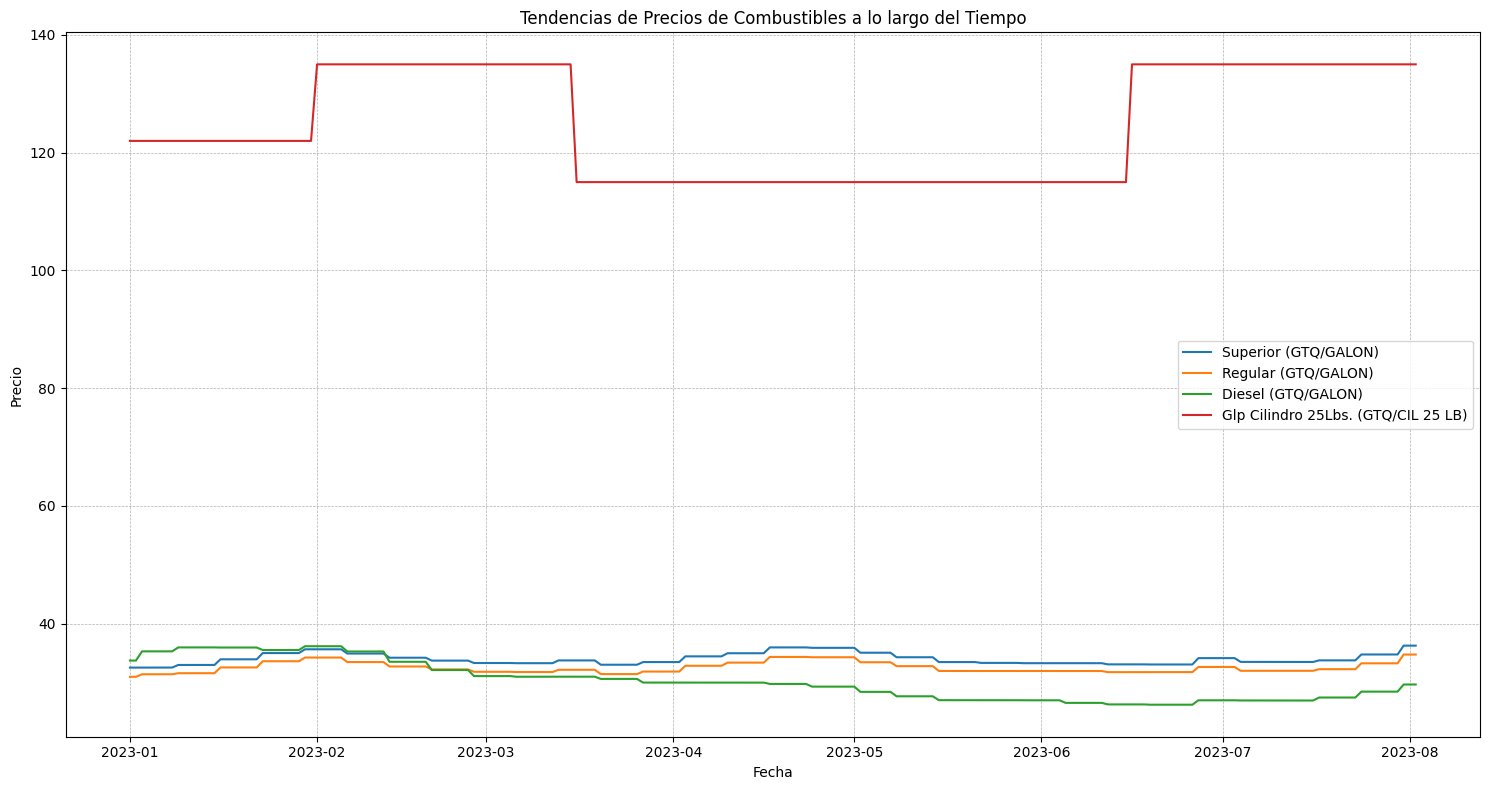

In [52]:

df_price_clean = df_price_clean.rename(columns={df_price_clean.columns[0]: "Fecha"})

plt.figure(figsize=(15, 8))

for col in cols_to_read:
    plt.plot(df_price_clean["Fecha"], df_price_clean[col], label=col)

plt.title('Tendencias de Precios de Combustibles a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

En el grafico muestra las tendencias de precios de combustibles a lo largo del tiempo para el 2023:

- Gasolina Super: Ha mostrado fluctuaciones en su precio.

- Gasolina Regular: Ha seguido una tendencia similar a la gasolina superior con algunas variaciones.

- Diesel: Ha mostrado una mayor variabilidad en su precio en comparacion con las gasolinas.

- GLP: Ha tenido dos niveles de precios predominantes a lo largo del 2023.
 

In [63]:

importdf = pd.read_excel("IMPORTACION-VOLUMEN-2023-06.xlsx", skiprows=4)
importdf.head()




,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,Unidad: Barril (42 galones),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Naftas,Petcoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,MTBE,Orimulsión,Petróleo reconstituido,Total importación
2,2001-01-01 00:00:00,0,27748.99,214581.84,0,0,0,0,194065.738095,820,...,0,0,0,0,0,566101.99,8402,0,715344,2312639.048095
3,2001-02-01 00:00:00,0,7503.57,294609,0,0,0,0,170703.380952,3054,...,0,0,0,0,0,489525.8,0,0,370166,1769208.760952
4,2001-03-01 00:00:00,0,26304.32,315263.8,0,0,0,0,161837.371429,677,...,0,0,0,0,0,575559.68,0,0,360530,1945770.261429


In [64]:
importdf.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [65]:
importdf.head(3)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,Unidad: Barril (42 galones),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Naftas,Petcoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,MTBE,Orimulsión,Petróleo reconstituido,Total importación
2,2001-01-01 00:00:00,0,27748.99,214581.84,0,0,0,0,194065.738095,820,...,0,0,0,0,0,566101.99,8402,0,715344,2312639.048095


In [67]:

cols_import_relevantes = ["Unnamed: 0", "Unnamed: 7", "Unnamed: 8"]
import_subset_df = importdf[cols_import_relevantes]

import_subset_df = import_subset_df.rename(columns={
    "Unnamed: 0": "Fecha",
    "Unnamed: 7": "Diesel",
    "Unnamed: 8": "GLP"
})

import_subset_df = import_subset_df.drop([0, 1])

import_subset_df["Fecha"] = pd.to_datetime(import_subset_df["Fecha"], errors='coerce')
for col in ["Diesel", "GLP"]:
    import_subset_df[col] = pd.to_numeric(import_subset_df[col], errors='coerce')

#ELIMINAR NANS
import_subset_df = import_subset_df.dropna()

import_subset_df.head()


,Fecha,Diesel,GLP
2,2001-01-01,0.0,194065.738095
3,2001-02-01,0.0,170703.380952
4,2001-03-01,0.0,161837.371429
5,2001-04-01,0.0,163048.642857
6,2001-05-01,0.0,171518.861905


In [ ]:
mes_mayor_importacion_diesel = import_subset_df[import_subset_df["Diesel"] == import_subset_df["Diesel"].max()]["Fecha"]
mes_mayor_importacion_glp = import_subset_df[import_subset_df["GLP"] == import_subset_df["GLP"].max()]["Fecha"]

mes_mayor_importacion_diesel, mes_mayor_importacion_glp

Los meses con mayores importaciones para cada tipo de combustible:

- Diesel: Junio de 2020
- GLP: Octubre de 2020

In [ ]:


# Asegurarse de que la columna 'Diesel' contenga valores numéricos
import_subset_df['Diesel'] = pd.to_numeric(import_subset_df['Diesel'], errors='coerce')

# Asegurarse de que la columna 'Fecha' sea de tipo datetime
import_subset_df['Fecha'] = pd.to_datetime(import_subset_df['Fecha'])

# Crear una columna 'Año' a partir de la columna 'Fecha'
import_subset_df['Año'] = import_subset_df['Fecha'].dt.year

# Agrupar por año y calcular la suma de 'Diesel'
importaciones_por_año = import_subset_df.groupby('Año')['Diesel'].sum().reset_index()

# Graficar
plt.figure(figsize=(15, 8))
plt.plot(importaciones_por_año["Año"], importaciones_por_año["Diesel"], label="Diesel", marker='o')

plt.xlabel('Año')
plt.ylabel('Cantidad de Diesel')
plt.title('Importaciones de Diesel por Año')
plt.legend()
plt.grid(True)
plt.show()


Al ver el grafico de las tendencias de diesel y GLP comprendemos lo siguiente:

- Diesel : Se observa que las importaciones de diesel eran bajas hasta que en 2019, cuando empezaron a aumentar hasta llegar a su pico en 2020. Luego en 2021 y 2022, las importaciones de Diesel disminuyeron un poco pero se mantuvieron en niveles altos. En 2023, solo hay datos hasta mayo asi que la cifra es mucho menor.

- GLP: Las importaciones de GLP muestran una tendencia a crecer conforme los años, con algunos años teniendo picos como 2011, 2014 y 2020. A partir de 2021, parece haber una ligera disminución de importaciones de GLP.

## Inciso II:

A

In [ ]:


# Cargar y limpiar el archivo precios.xlsx
df_price = pd.read_excel("precios.xlsx")
df_price_cleaned = df_price.dropna(how='all').reset_index(drop=True)
df_price_cleaned.columns = df_price_cleaned.iloc[0]
df_price_cleaned = df_price_cleaned.drop(0).reset_index(drop=True)

# Asignar los nombres de las columnas correctamente
column_names = ['FECHA', 'Tipo de Cambio', 'Superior', 'Regular', 'Diesel', 'Bunker', 'GLP Cilindro 25Lbs', 'GLP LB']
df_price_cleaned.columns = column_names

# Filtrar las filas para mantener solo las entradas con fechas válidas
df_price_cleaned = df_price_cleaned[pd.to_datetime(df_price_cleaned['FECHA'], errors='coerce').notna()]

# Convertir la columna 'FECHA' a tipo datetime
df_price_cleaned['FECHA'] = pd.to_datetime(df_price_cleaned['FECHA'])

# Convertir las columnas de interés a tipo numérico
cols_to_convert = ['Superior', 'Regular', 'Diesel']
for col in cols_to_convert:
    df_price_cleaned[col] = pd.to_numeric(df_price_cleaned[col], errors='coerce')

# Agrupando por mes y sumando las columnas numéricas, excluyendo la columna "FECHA"
consumo_mensual = df_price_cleaned.groupby(df_price_cleaned['FECHA'].dt.to_period("M"))[cols_to_convert].sum()
# Seleccionar las columnas de interés: Gasolina Superior, Gasolina Regular y Diesel
consumo_mensual = consumo_mensual[cols_to_convert]

# Mostrando las primeras filas del dataframe de consumo mensual corregido
consumo_mensual.head()




####  B


In [ ]:


data_super = df_price_clean[['Fecha', 'Superior (GTQ/GALON)']].set_index('Fecha')
date_index_numeric = np.arange(len(data_super))

# Dividir los datos en conjuntos de entrenamiento y prueba
train = data_super[:-30]  # Todos los datos excepto el último mes
test = data_super[-30:]   # Último mes

# Crear modelo SARIMA
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 30))
results = model.fit(disp=False)


# Realizar predicciones
forecast = results.get_forecast(steps=30)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

plt.figure(figsize=(15, 8))

plt.plot(date_index_numeric, data_super['Superior (GTQ/GALON)'], label='Datos Reales', color='blue')

forecast_index = np.arange(len(data_super)-30, len(data_super))
plt.plot(forecast_index, mean_forecast.values, color='red', label='Predicciones')

plt.fill_between(forecast_index, confidence_intervals['lower Superior (GTQ/GALON)'], confidence_intervals['upper Superior (GTQ/GALON)'], color='pink', alpha=0.3)

plt.title('Estimación de Precios para Gasolina Superior')
plt.xlabel('Índice de Fecha (convertido a numérico)')
plt.ylabel('Precio (GTQ/GALON)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Los datos reales estan en azul, las predicciones para el último mes en rojo, el área sombreada en rosa representa el intervalo de confianza para las predicciones.

El modelo ha generado predicciones que se alinean razonablemente bien con los valores reales aunque con cierta variación.

# C


In [ ]:
# Convirtiendo el índice de tipo Period a datetime
consumo_mensual.index = consumo_mensual.index.to_timestamp()

# Visualización de las series temporales de precios
plt.figure(figsize=(14, 8))

# Gráficas para cada tipo de combustible
plt.plot(consumo_mensual.index, consumo_mensual['Superior'], label='Gasolina Superior', color='blue')
plt.plot(consumo_mensual.index, consumo_mensual['Regular'], label='Gasolina Regular', color='green')
plt.plot(consumo_mensual.index, consumo_mensual['Diesel'], label='Diésel', color='red')

# Configuración de la gráfica
plt.title('Precios en Ciudad Capital (GTQ)')
plt.xlabel('Fecha')
plt.ylabel('Precio (GTQ)')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


## Inciso 3

# A


In [ ]:
# Inciso 3.a. Especificando inicio, fin y frecuencia para la Gasolina Superior

# Inicio y fin de la serie
inicio = consumo_mensual.index.min()
fin = consumo_mensual.index.max()

# Frecuencia: mensual (basado en la agrupación que hicimos anteriormente)
frecuencia = "Mensual"

inicio, fin, frecuencia


# B


In [ ]:
# Inciso 3.b. Gráfico de la serie de Gasolina Superior

plt.figure(figsize=(14, 6))
plt.plot(consumo_mensual.index, consumo_mensual['Superior'], color='blue', marker='o')
plt.title('Precios de Gasolina Superior en Ciudad Capital (GTQ)')
plt.xlabel('Fecha')
plt.ylabel('Precio (GTQ)')
plt.grid(True)
plt.tight_layout()
plt.show()


# C

# D

In [ ]:


# Realizando la prueba de Dickey-Fuller Aumentada
result = adfuller(consumo_mensual['Superior'])

# Presentando los resultados
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

adf_statistic, p_value, critical_values


Para la serie de Gasolina Superior, aunque no pudimos realizar una descomposición estacional completa debido a la falta de datos, podemos inspeccionar visualmente la serie para identificar estas características. También podemos utilizar pruebas estadísticas, como la prueba de Dickey-Fuller Aumentada, para evaluar la estacionariedad en media.

# E. I

In [ ]:


# Gráfico de autocorrelación para la serie de Gasolina Superior
plt.figure(figsize=(14, 6))
plot_acf(consumo_mensual['Superior'], lags=7)
plt.title('Autocorrelación para Gasolina Superior')
plt.show()


# E. II

In [ ]:
# Diferenciando la serie de Gasolina Superior
gasolina_superior_diff = consumo_mensual['Superior'].diff().dropna()

# Realizando la prueba de Dickey-Fuller Aumentada para la serie diferenciada
result_diff = adfuller(gasolina_superior_diff)

# Presentando los resultados
adf_statistic_diff = result_diff[0]
p_value_diff = result_diff[1]
critical_values_diff = result_diff[4]

adf_statistic_diff, p_value_diff, critical_values_diff


# E III

In [ ]:
# Diferenciando la serie de Gasolina Superior
gasolina_superior_diff = consumo_mensual['Superior'].diff().dropna()

# Realizando la prueba de Dickey-Fuller Aumentada para la serie diferenciada
result_diff = adfuller(gasolina_superior_diff)

# Presentando los resultados
adf_statistic_diff = result_diff[0]
p_value_diff = result_diff[1]
critical_values_diff = result_diff[4]

adf_statistic_diff, p_value_diff, critical_values_diff



# F

In [ ]:


# Gráficos de autocorrelación y autocorrelación parcial para la serie diferenciada de Gasolina Superior con 2 lags
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plot_acf(gasolina_superior_diff, lags=2, ax=plt.gca(), title="ACF para Gasolina Superior (Diferenciada)")
plt.subplot(1, 2, 2)
plot_pacf(gasolina_superior_diff, lags=2, ax=plt.gca(), title="PACF para Gasolina Superior (Diferenciada)")
plt.tight_layout()
plt.show()


Ahora, basándonos en los gráficos de autocorrelación (ACF) y autocorrelación parcial (PACF) para la serie diferenciada de Gasolina Superior:

ACF (Autocorrelación): Observamos un retraso significativo en el lag 1. Esto sugiere un término MA(1) para el componente de media móvil.

PACF (Autocorrelación Parcial): Observamos un retraso significativo en el lag 1. Esto sugiere un término AR(1) para el componente autorregresivo.

# G

In [ ]:


# Definir un rango de valores para p, d y q
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

# Almacenar los resultados
results = []

# Iterar sobre todas las combinaciones de p, d y q
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                # Ajustar el modelo ARIMA
                model = ARIMA(consumo_mensual['Superior'], order=(p, d, q))
                results_arima = model.fit()
                
                # Guardar los resultados (AIC, BIC, parámetros y el modelo)
                results.append({
                    'p': p,
                    'd': d,
                    'q': q,
                    'AIC': results_arima.aic,
                    'BIC': results_arima.bic,
                    'model': results_arima
                })
            except:
                continue

# Ordenar los resultados por AIC y BIC
results_sorted_aic = sorted(results, key=lambda x: x['AIC'])
results_sorted_bic = sorted(results, key=lambda x: x['BIC'])

# Extraer el mejor modelo según AIC y BIC
best_model_aic = results_sorted_aic[0]['model']
best_model_bic = results_sorted_bic[0]['model']

results_sorted_aic[0], results_sorted_bic[0]


In [ ]:


# Obtener los residuos del mejor modelo
residuos = best_model_aic.resid

# Gráficos de los residuos
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
residuos.plot(title="Residuos del modelo ARIMA(0, 2, 0)")
plt.subplot(1, 2, 2)
residuos.plot(kind='kde', title="Distribución de los residuos")
plt.tight_layout()
plt.show()

# Realizar la prueba de normalidad
k2_statistic, p_value_normality = normaltest(residuos.dropna())
p_value_normality


# H

In [ ]:


# Definir el tamaño de la ventana
window_size = 2

# Normalizar la serie de tiempo
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_series = scaler.fit_transform(consumo_mensual['Superior'].values.reshape(-1, 1))

# Crear ventanas deslizantes usando TimeseriesGenerator
generator = TimeseriesGenerator(scaled_series, scaled_series, length=window_size, batch_size=1)

# Extraer las secuencias y sus correspondientes etiquetas
X, y = [], []
for i in range(len(generator)):
    data, label = generator[i]
    X.append(data[0])
    y.append(label[0])
X = np.array(X)
y = np.array(y)

X, y


# 4


In [ ]:


# Inicialización de listas para almacenar las predicciones y valores reales
predictions = []
actual_values = []

# Tamaño inicial para la ventana de entrenamiento
initial_size = 5

# Ciclo de validación cruzada de series temporales
for t in range(initial_size, len(consumo_mensual)):
    # Definir el conjunto de entrenamiento hasta el punto t
    train = consumo_mensual['Superior'][:t]
    
    # Obtener el valor real en el punto t
    actual_value = consumo_mensual['Superior'][t]
    
    # Ajustar el modelo ARIMA y predecir el siguiente punto
    model = ARIMA(train, order=(0, 2, 0))
    model_fit = model.fit()
    prediction = model_fit.forecast(steps=1)[0]
    
    # Almacenar la predicción y el valor real
    predictions.append(prediction)
    actual_values.append(actual_value)

# Convertir las listas en arrays de numpy
predictions = np.array(predictions)
actual_values = np.array(actual_values)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(actual_values, predictions)
mse

# 5

In [ ]:


# Entrenar el modelo con los primeros 5 meses de 2023
train_data_2023 = consumo_mensual['Superior'][:5]

# Ajustar el modelo ARIMA
model_2023 = ARIMA(train_data_2023, order=(0, 2, 0))
model_fit_2023 = model_2023.fit()

# Hacer predicciones para todo el año 2023
forecast_2023 = model_fit_2023.forecast(steps=len(consumo_mensual)-5)

# Comparar las predicciones con los datos reales de 2023
actual_2023 = consumo_mensual['Superior'][5:].values

# Calcular el error cuadrático medio (MSE) para las predicciones de 2023
mse_2023 = mean_squared_error(actual_2023, forecast_2023)


mse_2023

#6

Al observar la información se puede mencionar sobre el periodo más crítico de la pandemia, se observa una baja en la demanda de combustibles debido a la cuarentena, esto abarcando las restricciones de movimiento, cierres temporales en la industria y cambios en la rutina diaria de las ersonas. Se puede especular que con el paso de la nueva normalidad se observa un incremento en la demanda de combustibles, esto debido a la reactivación de la industria y el regreso a las actividades diarias de las personas. 